In [79]:
tf.__version__

'2.11.0'

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.8/dist-packages/tensorflow-2.9.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.9.2


'2.9.2'

In [ ]:
!pip install tensorflow

In [80]:
import tensorflow as tf
import numpy as np
import scipy
from scipy import ndimage
from tensorflow import keras
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
import matplotlib.pyplot as plt

In [81]:
import os
from google.colab import drive

drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
# Loading Images
import pathlib
import tensorflow as tf

train_set = tf.keras.utils.image_dataset_from_directory(
    '/content/gdrive/MyDrive/Sitting_posture/dataset_pose',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=9, 
    validation_split=0.2,
    subset='training'
)

test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/gdrive/MyDrive/Sitting_posture/dataset_pose',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=9, 
    validation_split=0.2,
    subset='validation'
)

print(type(train_set), type(test_set))

Found 453 files belonging to 2 classes.
Using 363 files for training.
Found 453 files belonging to 2 classes.
Using 90 files for validation.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'> <class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [76]:
for data, labels in train_set.take(1):
  print(data.shape)
  print(labels.shape, "\n")

for data, labels in test_set.take(1):
  print(data.shape)
  print(labels.shape)
  print("\nEach RGB image is of size 224 * 224, and each batch has 32 such images. \nData labels is a 1D array specifying a label against every image.")

(32, 224, 224, 3)
(32,) 

(32, 224, 224, 3)
(32,)

Each RGB image is of size 224 * 224, and each batch has 32 such images. 
Data labels is a 1D array specifying a label against every image.


['correct', 'wrong']
<class 'str'>


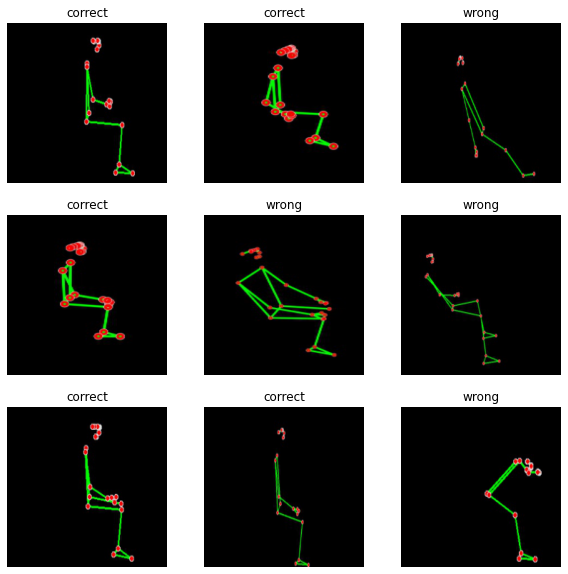

In [52]:
import matplotlib.pyplot as plt
 
class_names = train_set.class_names
print(class_names)
print(type(class_names[0]))
plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    #print(labels)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [60]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [61]:
model = ResNet50(weights=None, classes=2)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

In [62]:
history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=20, 
  callbacks=[callback]
)

Epoch 1/20
12/12 [==============================] - 36s 446ms/step - loss: 1.7158 - accuracy: 0.7245 - val_loss: 459.9091 - val_accuracy: 0.5000
Epoch 2/20
12/12 [==============================] - 5s 371ms/step - loss: 0.2748 - accuracy: 0.9091 - val_loss: 553.4973 - val_accuracy: 0.5000
Epoch 3/20
12/12 [==============================] - 5s 374ms/step - loss: 0.0995 - accuracy: 0.9532 - val_loss: 236.4152 - val_accuracy: 0.5000
Epoch 4/20
12/12 [==============================] - 5s 373ms/step - loss: 0.0337 - accuracy: 0.9835 - val_loss: 86.1960 - val_accuracy: 0.5000
Epoch 5/20
12/12 [==============================] - 5s 370ms/step - loss: 0.0257 - accuracy: 0.9945 - val_loss: 45.1735 - val_accuracy: 0.5000
Epoch 6/20
12/12 [==============================] - 5s 380ms/step - loss: 0.0615 - accuracy: 0.9807 - val_loss: 22.0127 - val_accuracy: 0.5111
Epoch 7/20
12/12 [==============================] - 5s 361ms/step - loss: 0.0554 - accuracy: 0.9807 - val_loss: 1.9109 - val_accuracy: 0.6

In [73]:
model.save('/content/gdrive/MyDrive/Sitting_posture/Sit_Well_ResNet')

1/1 [==============================] - 0s 34ms/step
tf.Tensor([1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1], shape=(32,), dtype=int32)


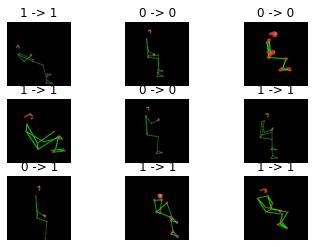

In [71]:
for images, labels in test_set:
  predictions = model.predict(images)
  print(labels)
  for i in range(0, 9):
    # print(train_x[0].shape)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predict = predictions[i].argmax()
    actual = labels[i].numpy()
    plt.title(f"{actual} -> {predict}")
    plt.axis("off")
  break

ValueError: ignored